In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../DATA/RSCCASN.csv', parse_dates=True, index_col='DATE')

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

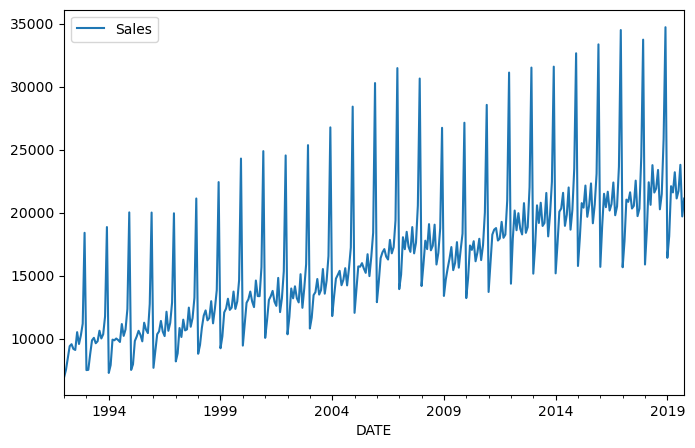

In [5]:
df.plot(figsize = (8,5))

In [6]:
len(df) - 18

316

In [7]:
test_size = 18
test_ind = len(df) - test_size

In [8]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [9]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [10]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(train)

MinMaxScaler()

In [14]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

In [16]:
len(test)

18

In [17]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=12, batch_size=1)

In [18]:
X,y = generator[0]

In [19]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [20]:
y

array([[0.02047633]])

In [21]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [23]:
n_features = 1

In [24]:
model = Sequential()

model.add(LSTM(100, activation='relu',input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [28]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [29]:
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
  8/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0600  

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0343 - val_loss: 0.0038
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0166 - val_loss: 0.0049
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0087 - val_loss: 0.0012
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0049 - val_loss: 8.1849e-04
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0019 - val_loss: 0.0019


In [30]:
losses = pd.DataFrame(model.history.history)

<Axes: >

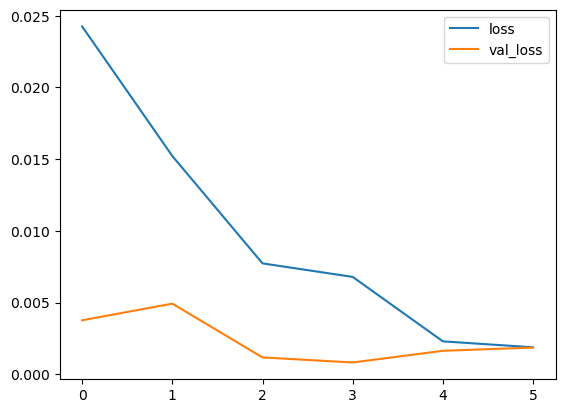

In [31]:
losses.plot()

In [32]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))


for i in range(len(test)):
    currnt_pred = model.predict(current_batch)[0]
    test_predictions.append(currnt_pred)

    current_batch = np.append(current_batch[:,1:,:], [[currnt_pred]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [33]:
true_predictions = scaler.inverse_transform(test_predictions)

In [34]:
test.loc[:,'Predictions'] = true_predictions

C:\Users\kuban\AppData\Local\Temp\ipykernel_23012\1331392772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'Predictions'] = true_predictions


<Axes: xlabel='DATE'>

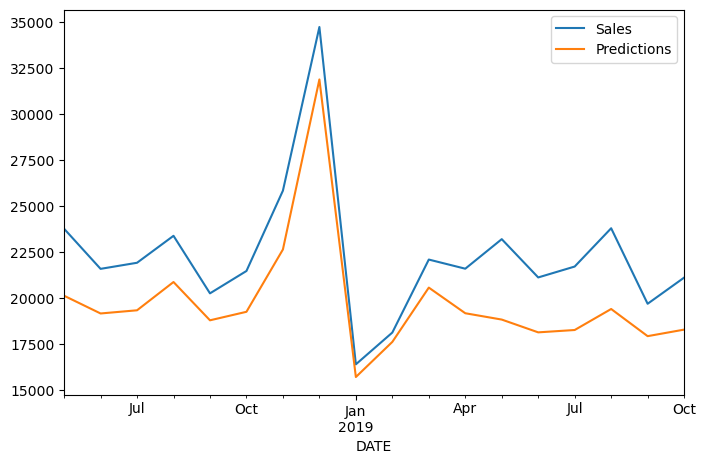

In [35]:
test.plot(figsize = (8,5))

In [36]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)


In [37]:
model = Sequential()

model.add(LSTM(100, activation='relu',input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.fit(generator, epochs = 8)

Epoch 1/8
 22/322 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1095

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0406
Epoch 2/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0165
Epoch 3/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0054
Epoch 4/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0056
Epoch 5/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0020
Epoch 6/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0016
Epoch 7/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0019
Epoch 8/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0016


In [39]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))


for i in range(12):
    currnt_pred = model.predict(current_batch)[0]
    forecast.append(currnt_pred)

    current_batch = np.append(current_batch[:,1:,:], [[currnt_pred]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [40]:
forecast = scaler.inverse_transform(forecast)

In [41]:
forecast_index = pd.date_range(start = '2019-11-01', periods = 12,freq='MS')

In [42]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns=['Forecast'])

(576.0, 611.0)

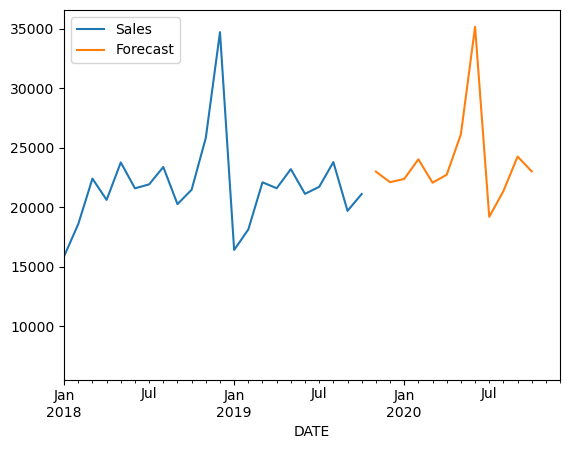

In [43]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')